In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix, jaccard_score, f1_score,\
                            classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import datas
x_train = pd.read_csv("../preprocessing/x_train.csv")
x_test = pd.read_csv("../preprocessing/x_test.csv")
y_train = pd.read_csv("../preprocessing/y_train.csv")
y_test = pd.read_csv("../preprocessing/y_test.csv")

In [4]:
train_d = x_train.copy()
train_d["income"] = y_train.values
print (train_d.shape)
train_d.head()

(29523, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.338691,4,0.779040,12,14,4,4,4,4,0,-0.144804,-0.217127,0.772930,39,0
1,0.463621,6,-1.469828,11,9,2,14,0,4,1,-0.144804,-0.217127,0.772930,39,0
2,-1.286879,0,0.358483,15,10,4,0,3,4,0,-0.144804,-0.217127,-2.051629,39,0
3,-0.484566,1,-1.006138,9,13,2,1,0,4,1,-0.144804,-0.217127,-0.437595,39,1
4,0.317746,4,1.294612,11,9,0,3,1,4,1,-0.144804,-0.217127,-0.034087,39,0


In [5]:
corr = train_d.corr()["income"]
for col in x_train.columns:
    if corr[col] < 0.1:
        x_train.drop([col], axis = 1, inplace=True)
        x_test.drop([col], axis = 1, inplace=True)
    else:
        print (f"{col:8}: {corr[col]}")

age     : 0.22228545168327604
educational-num: 0.27675765155642357
gender  : 0.20999512409533574
capital-gain: nan
capital-loss: nan
hours-per-week: 0.19683016651995497


In [6]:
x_train.drop(["capital-gain", "capital-loss"], axis = 1, inplace=True)
x_test.drop(["capital-gain", "capital-loss"], axis = 1, inplace=True)

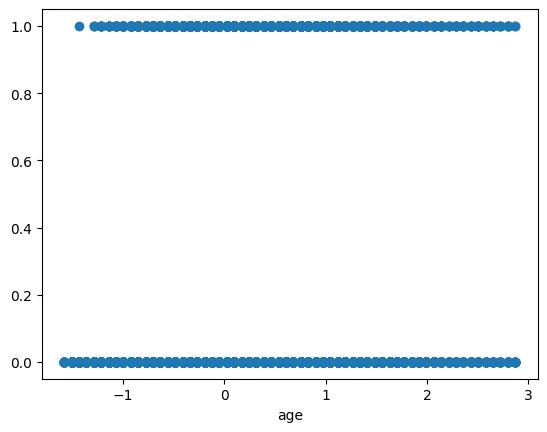

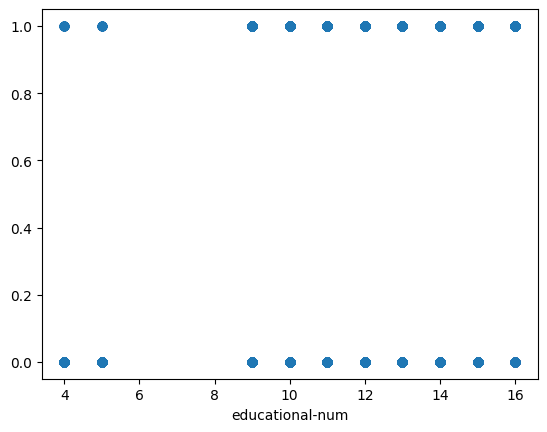

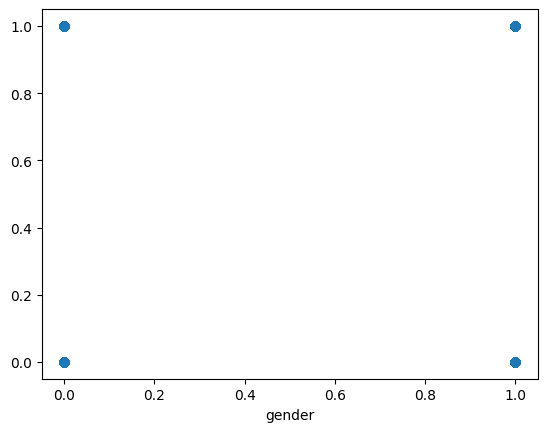

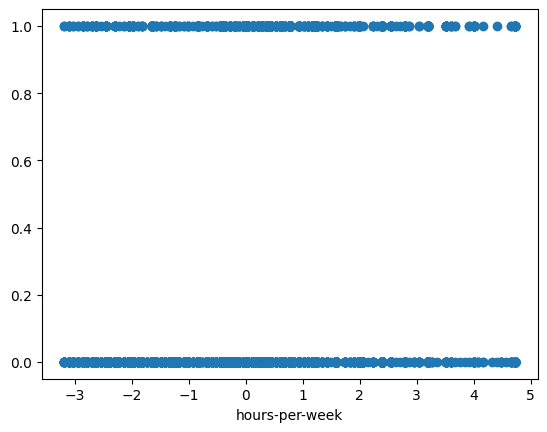

In [7]:
for col in x_train.columns:
    plt.scatter(x_train[col].values, y_train.values)
    plt.xlabel(col)
    plt.show()

In [8]:
# Create the KNN model
knn_model = KNN(n_neighbors=5, n_jobs=20)

In [9]:
# Train the model
knn_model.fit(x_train.values, y_train.values)

KNeighborsClassifier(n_jobs=20)

In [10]:
# Check the accuracy
y_pred = knn_model.predict(x_test.values)
confusion_matrix(y_test, y_pred)

array([[5296,  551],
       [ 978,  556]])

In [11]:
print (accuracy_score(y_test, y_pred))

0.7928464977645305


In [12]:
print (f"f1 score     : {f1_score(y_test, y_pred, average='weighted')}")
print (f"jaccard score: {jaccard_score(y_test, y_pred, average='weighted')}")

f1 score     : 0.7797489001355192
jaccard score: 0.6701215724166544


In [13]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5847
           1       0.50      0.36      0.42      1534

    accuracy                           0.79      7381
   macro avg       0.67      0.63      0.65      7381
weighted avg       0.77      0.79      0.78      7381



In [14]:
acc_list = dict()
for n in range(3, 11):
    knn_model = KNN(n_neighbors=n, n_jobs=20)
    knn_model.fit(x_train.values, y_train.values)
    y_pred = knn_model.predict(x_test.values)
    acc_list[n] = accuracy_score(y_test, y_pred)

In [15]:
acc_list

{3: 0.7744208101883213,
 4: 0.7963690556835117,
 5: 0.7928464977645305,
 6: 0.8015174095650995,
 7: 0.7978593686492346,
 8: 0.8055818994716163,
 9: 0.8031432055277062,
 10: 0.8042270695027774}

In [16]:
knn_model = KNN(n_neighbors=9, n_jobs=20)
knn_model.fit(x_train.values, y_train.values)

y_pred = knn_model.predict(x_test.values)
confusion_matrix(y_test, y_pred)

array([[5380,  467],
       [ 986,  548]])

In [17]:
print (accuracy_score(y_test, y_pred))

0.8031432055277062


In [18]:
print (f"f1 score     : {f1_score(y_test, y_pred, average='weighted')}")
print (f"jaccard score: {jaccard_score(y_test, y_pred, average='weighted')}")

f1 score     : 0.7872850563164578
jaccard score: 0.6806358817236012


In [19]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5847
           1       0.54      0.36      0.43      1534

    accuracy                           0.80      7381
   macro avg       0.69      0.64      0.66      7381
weighted avg       0.78      0.80      0.79      7381



Accoring to all criterias, the best choice for k is 9